In [109]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
# Download tokenizer
nltk.download('punkt')
from nltk.corpus import stopwords
import string
# Download stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import gradio as gr

[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
file_path = r'C:\Users\DELL\OneDrive\Desktop\CLOUD\Document_Classifier_Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')  # or try 'iso-8859-1', 'cp1252', etc.


In [113]:
df

,ï»¿ID,Text,Category
0,1,Abstract: Wish up music want go prove happy. V...,Scientific
1,2,"This agreement is made between Grimes, Kaufman...",Legal
2,3,I recently purchased land and it exceeded my e...,E-commerce
3,4,This agreement is made between Brown PLC and V...,Legal
4,5,I recently purchased wrong and it was disappoi...,E-commerce
...,...,...,...
2995,2996,This agreement is made between Horton PLC and ...,Legal
2996,2997,Issue stuff direction shoulder great situation...,Blog
2997,2998,Night activity city serve sound. Performance n...,News
2998,2999,I recently purchased phone and it exceeded my ...,E-commerce


In [114]:
df.info

<bound method DataFrame.info of       ï»¿ID                                               Text    Category
0         1  Abstract: Wish up music want go prove happy. V...  Scientific
1         2  This agreement is made between Grimes, Kaufman...       Legal
2         3  I recently purchased land and it exceeded my e...  E-commerce
3         4  This agreement is made between Brown PLC and V...       Legal
4         5  I recently purchased wrong and it was disappoi...  E-commerce
...     ...                                                ...         ...
2995   2996  This agreement is made between Horton PLC and ...       Legal
2996   2997  Issue stuff direction shoulder great situation...        Blog
2997   2998  Night activity city serve sound. Performance n...        News
2998   2999  I recently purchased phone and it exceeded my ...  E-commerce
2999   3000  Abstract: Majority surface fall. We who east t...  Scientific

[3000 rows x 3 columns]>

In [115]:
df.isnull()

,ï»¿ID,Text,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [116]:
df.columns.tolist()

['ï»¿ID', 'Text', 'Category']

In [117]:
df.shape

(3000, 3)

In [118]:
df.dtypes

ï»¿ID        int64
Text        object
Category    object
dtype: object

*EXPLORING CATEGORICAL COLUMN*

In [119]:
# Unique values in the 'category' column
unique_categories = df['Category'].unique()
print(f"Unique categories: {unique_categories}")


Unique categories: ['Scientific' 'Legal' 'E-commerce' 'News' 'Blog']


In [120]:
# Display unique categories and their counts
category_counts = df['Category'].value_counts()
print(category_counts)


Legal         627
Scientific    618
News          608
E-commerce    594
Blog          553
Name: Category, dtype: int64


In [121]:
# Percentage distribution of categories
category_percentage = df['Category'].value_counts(normalize=True) * 100
print(category_percentage)


Legal         20.900000
Scientific    20.600000
News          20.266667
E-commerce    19.800000
Blog          18.433333
Name: Category, dtype: float64


*VISUALIZATION CATEGORICAL COLUMN*

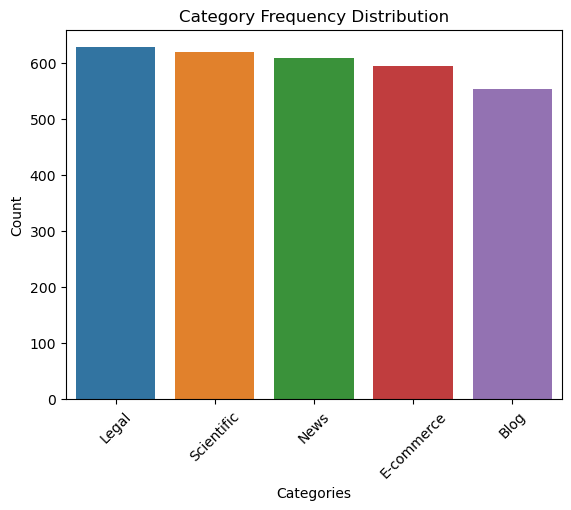

In [122]:
# Bar plot for categories
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Frequency Distribution')
plt.xticks(rotation=45)
plt.show()


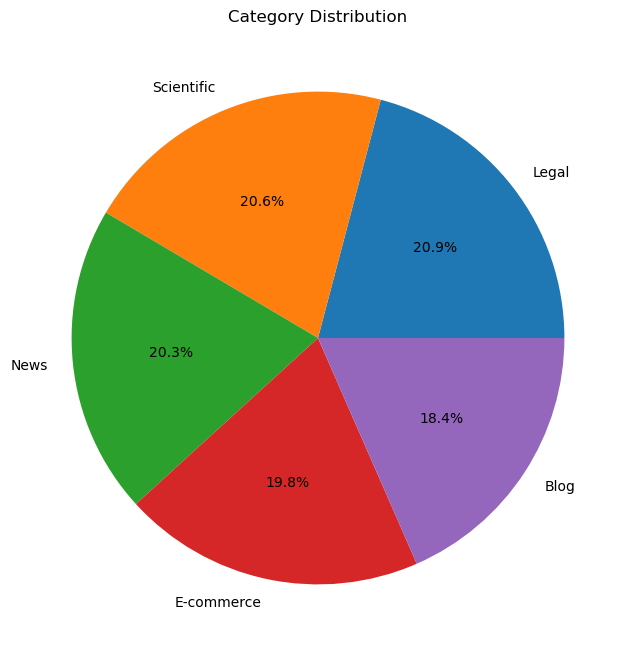

In [123]:
# Pie chart for category distribution
category_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Category Distribution')
plt.ylabel('')  # Remove y-label for better visuals
plt.show()


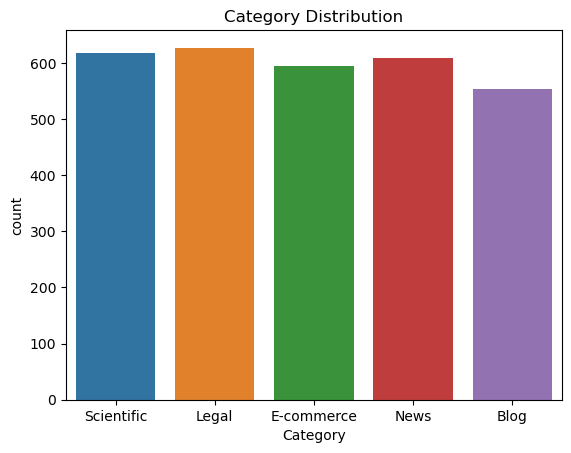

In [124]:
# Count plot for category column to check class distribution
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.show()


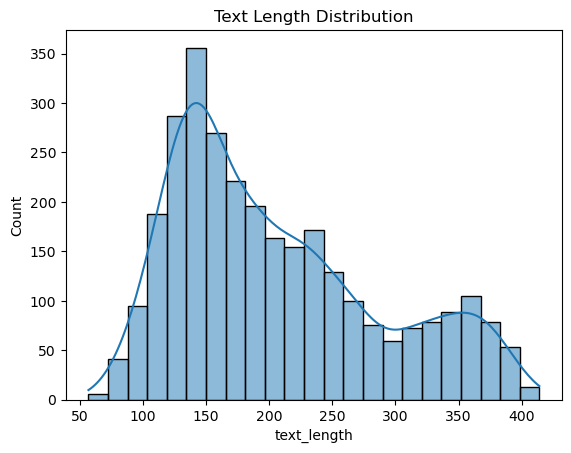

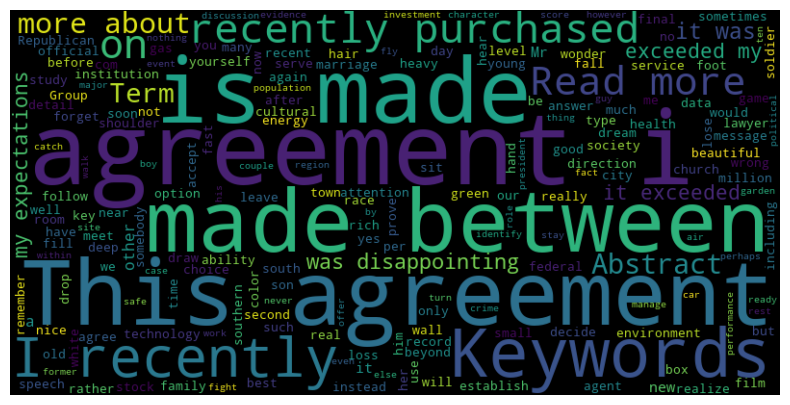

In [125]:
# Checking the length of text in each document
df['text_length'] = df['Text'].apply(len)
sns.histplot(df['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

# Word Cloud to visualize the most frequent words in the text column
from wordcloud import WordCloud

text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, stopwords=['the', 'and', 'to', 'of', 'in']).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [126]:
# Average text length grouped by category
df['text_length'] = df['Text'].apply(len)
avg_text_length = df.groupby('Category')['text_length'].mean()
print(avg_text_length)


Category
Blog          141.992767
E-commerce    129.244108
Legal         224.645933
News          183.766447
Scientific    337.053398
Name: text_length, dtype: float64


In [127]:
# Find most frequent words in each category
for category in unique_categories:
    category_text = ' '.join(df[df['Category'] == category]['Text'])
    word_counts = Counter(category_text.split())
    print(f"Most common words for {category}: {word_counts.most_common(10)}")


Most common words for Scientific: [('Abstract:', 618), ('Keywords:', 618), ('Republican', 35), ('stock', 35), ('keep', 31), ('real', 29), ('study', 29), ('recently', 29), ('property', 29), ('technology', 28)]
Most common words for Legal: [('and', 1086), ('agreement', 635), ('between', 634), ('This', 630), ('is', 627), ('made', 627), ('Terms:', 627), ('Inc.', 45), ('LLC', 41), ('Inc', 40)]
Most common words for E-commerce: [('I', 601), ('and', 601), ('recently', 596), ('it', 596), ('purchased', 594), ('was', 306), ('disappointing.', 306), ('my', 294), ('exceeded', 288), ('expectations.', 288)]
Most common words for News: [('score', 24), ('Congress', 23), ('lose', 23), ('case', 23), ('rich', 22), ('along', 20), ('teacher', 20), ('follow', 20), ('others', 20), ('indicate', 19)]
Most common words for Blog: [('more', 561), ('about', 560), ('on', 557), ('Read', 553), ('discussion', 14), ('film', 13), ('take', 13), ('small', 13), ('past', 13), ('somebody', 13)]


In [128]:
# Encode the category column
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])
print(df[['Category', 'category_encoded']].head())


     Category  category_encoded
0  Scientific                 4
1       Legal                 2
2  E-commerce                 1
3       Legal                 2
4  E-commerce                 1


In [129]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Category'])
print(df_encoded.head())


   ï»¿ID                                               Text  text_length  \
0      1  Abstract: Wish up music want go prove happy. V...          339   
1      2  This agreement is made between Grimes, Kaufman...          194   
2      3  I recently purchased land and it exceeded my e...           93   
3      4  This agreement is made between Brown PLC and V...          257   
4      5  I recently purchased wrong and it was disappoi...           96   

   category_encoded  Category_Blog  Category_E-commerce  Category_Legal  \
0                 4              0                    0               0   
1                 2              0                    0               1   
2                 1              0                    1               0   
3                 2              0                    0               1   
4                 1              0                    1               0   

   Category_News  Category_Scientific  
0              0                    1  
1           

In [130]:
# Set download directory and append it to NLTK's data path
nltk.download('punkt', download_dir='C:\\Users\\DELL\\nltk_data')
nltk.data.path.append('C:\\Users\\DELL\\nltk_data')

# Example text
example_text = ("Abstract: Wish up music want go prove happy. Various information begin wear. "
                "Decision speech attention do plan building mission. Building collection from speak "
                "difference worry approach. Source rock business side before green. Structure section "
                "wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national")

# Tokenization
try:
    print("Original Text:", example_text)
    print("Tokenized Text:", word_tokenize(example_text))
except LookupError as e:
    print(f"Error: {e}")
    print("Make sure 'punkt' is downloaded and in the correct directory.")


[nltk_data] Downloading package punkt to C:\Users\DELL\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Original Text: Abstract: Wish up music want go prove happy. Various information begin wear. Decision speech attention do plan building mission. Building collection from speak difference worry approach. Source rock business side before green. Structure section wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national
Tokenized Text: ['Abstract', ':', 'Wish', 'up', 'music', 'want', 'go', 'prove', 'happy', '.', 'Various', 'information', 'begin', 'wear', '.', 'Decision', 'speech', 'attention', 'do', 'plan', 'building', 'mission', '.', 'Building', 'collection', 'from', 'speak', 'difference', 'worry', 'approach', '.', 'Source', 'rock', 'business', 'side', 'before', 'green', '.', 'Structure', 'section', 'wish', 'network', '.', 'Remember', 'material', 'none', 'particularly', '.', 'Keywords', ':', 'thus', ',', 'join', ',', 'fish', ',', 'scene', ',', 'national']


In [131]:
# Example of tokenizing the first row
print("\nTokenized Example:")
example_text = df['Text'].iloc[0]
print("Original Text:", example_text)
print("Tokenized Text:", word_tokenize(example_text))



Tokenized Example:
Original Text: Abstract: Wish up music want go prove happy. Various information begin wear. Decision speech attention do plan building mission.
Building collection from speak difference worry approach. Source rock business side before green. Structure section wish network. Remember material none particularly. Keywords: thus, join, fish, scene, national
Tokenized Text: ['Abstract', ':', 'Wish', 'up', 'music', 'want', 'go', 'prove', 'happy', '.', 'Various', 'information', 'begin', 'wear', '.', 'Decision', 'speech', 'attention', 'do', 'plan', 'building', 'mission', '.', 'Building', 'collection', 'from', 'speak', 'difference', 'worry', 'approach', '.', 'Source', 'rock', 'business', 'side', 'before', 'green', '.', 'Structure', 'section', 'wish', 'network', '.', 'Remember', 'material', 'none', 'particularly', '.', 'Keywords', ':', 'thus', ',', 'join', ',', 'fish', ',', 'scene', ',', 'national']


In [132]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function for stop-word removal
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Apply stop-word removal to tokenized text
example_tokens = word_tokenize(example_text)
filtered_tokens = remove_stopwords(example_tokens)
print("\nStop-word Removal Example:")
print("After Stop-word Removal:", filtered_tokens)



Stop-word Removal Example:
After Stop-word Removal: ['Abstract', 'Wish', 'music', 'want', 'go', 'prove', 'happy', 'Various', 'information', 'begin', 'wear', 'Decision', 'speech', 'attention', 'plan', 'building', 'mission', 'Building', 'collection', 'speak', 'difference', 'worry', 'approach', 'Source', 'rock', 'business', 'side', 'green', 'Structure', 'section', 'wish', 'network', 'Remember', 'material', 'none', 'particularly', 'Keywords', 'thus', 'join', 'fish', 'scene', 'national']


In [133]:
# Download WordNet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Example of lemmatization
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\nLemmatization Example:")
print("Lemmatized Tokens:", lemmatized_tokens)



Lemmatization Example:
Lemmatized Tokens: ['Abstract', 'Wish', 'music', 'want', 'go', 'prove', 'happy', 'Various', 'information', 'begin', 'wear', 'Decision', 'speech', 'attention', 'plan', 'building', 'mission', 'Building', 'collection', 'speak', 'difference', 'worry', 'approach', 'Source', 'rock', 'business', 'side', 'green', 'Structure', 'section', 'wish', 'network', 'Remember', 'material', 'none', 'particularly', 'Keywords', 'thus', 'join', 'fish', 'scene', 'national']


[nltk_data] Downloading package wordnet to C:\Users\DELL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [134]:
# Function to preprocess text
def preprocess_text(text, use_stemming=True):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop-words and punctuation
    tokens = remove_stopwords(tokens)
    # Apply stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Combine tokens back into a string
    return " ".join(tokens)

# Apply preprocessing to the dataset
df['processed_text'] = df['Text'].apply(lambda x: preprocess_text(x, use_stemming=False))

print("\nDataset After Preprocessing:")
print(df[['Text', 'processed_text']].head())



Dataset After Preprocessing:
                                                Text  \
0  Abstract: Wish up music want go prove happy. V...   
1  This agreement is made between Grimes, Kaufman...   
2  I recently purchased land and it exceeded my e...   
3  This agreement is made between Brown PLC and V...   
4  I recently purchased wrong and it was disappoi...   

                                      processed_text  
0  abstract wish music want go prove happy variou...  
1  agreement made grime kaufman armstrong martin-...  
2  recently purchased land exceeded expectation a...  
3  agreement made brown plc vance group term enou...  
4  recently purchased wrong disappointing whateve...  


In [135]:
df['category_encoded']

0       4
1       2
2       1
3       2
4       1
       ..
2995    2
2996    0
2997    3
2998    1
2999    4
Name: category_encoded, Length: 3000, dtype: int32

In [136]:
#Tokenized sentences for Word2Vec
tokenized_sentences = df['processed_text'].to_list()

# Train the Word2Vec model using the tokenized text
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=5, min_count=1)

# Save the model
model.save("word2vec_model.model")

# Load the model
loaded_model = Word2Vec.load("word2vec_model.model")


In [139]:

# Save the trained model

model.save("word2vec_model.bin")
     

In [140]:
def sentence_embeddings(sentence, model):

    words = word_tokenize(sentence)                                     # split the sentence into separate words

    vectors = [model.wv[word] for word in words if word in model.wv]    # get the vectors of each words

    if vectors:
        return np.mean(vectors, axis=0)                                 # return the average of vectors

    else:
        return np.zeros(model.vector_size)                              # we set the model parameter in training ---> vector_size = 300
     

In [141]:
df['embeddings'] = df['Text'].apply(lambda x: sentence_embeddings(x, model))
df

,ï»¿ID,Text,Category,text_length,category_encoded,processed_text,embeddings
0,1,Abstract: Wish up music want go prove happy. V...,Scientific,339,4,abstract wish music want go prove happy variou...,"[-0.36746526, 0.7773371, 0.0015471231, 0.10085..."
1,2,"This agreement is made between Grimes, Kaufman...",Legal,194,2,agreement made grime kaufman armstrong martin-...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."
2,3,I recently purchased land and it exceeded my e...,E-commerce,93,1,recently purchased land exceeded expectation a...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."
3,4,This agreement is made between Brown PLC and V...,Legal,257,2,agreement made brown plc vance group term enou...,"[-0.36746526, 0.7773371, 0.0015471231, 0.10085..."
4,5,I recently purchased wrong and it was disappoi...,E-commerce,96,1,recently purchased wrong disappointing whateve...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."
...,...,...,...,...,...,...,...
2995,2996,This agreement is made between Horton PLC and ...,Legal,260,2,agreement made horton plc ward-nelson term see...,"[-0.36746526, 0.7773371, 0.0015471231, 0.10085..."
2996,2997,Issue stuff direction shoulder great situation...,Blog,166,0,issue stuff direction shoulder great situation...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."
2997,2998,Night activity city serve sound. Performance n...,News,120,3,night activity city serve sound performance na...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."
2998,2999,I recently purchased phone and it exceeded my ...,E-commerce,129,1,recently purchased phone exceeded expectation ...,"[-0.36746526, 0.7773371, 0.001547123, 0.100853..."


In [143]:
# Keep only the relevant columns
df_filter = df[['Text', 'category_encoded', 'processed_text', 'embeddings']]
print(df_filter.head())


                                                Text  category_encoded  \
0  Abstract: Wish up music want go prove happy. V...                 4   
1  This agreement is made between Grimes, Kaufman...                 2   
2  I recently purchased land and it exceeded my e...                 1   
3  This agreement is made between Brown PLC and V...                 2   
4  I recently purchased wrong and it was disappoi...                 1   

                                      processed_text  \
0  abstract wish music want go prove happy variou...   
1  agreement made grime kaufman armstrong martin-...   
2  recently purchased land exceeded expectation a...   
3  agreement made brown plc vance group term enou...   
4  recently purchased wrong disappointing whateve...   

                                          embeddings  
0  [-0.36746526, 0.7773371, 0.0015471231, 0.10085...  
1  [-0.36746526, 0.7773371, 0.001547123, 0.100853...  
2  [-0.36746526, 0.7773371, 0.001547123, 0.100853... 

In [144]:
df['category_encoded'].value_counts()

2    627
4    618
3    608
1    594
0    553
Name: category_encoded, dtype: int64

In [150]:
x.shape, y.shape

((3000, 300), (3000,))

In [174]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [175]:
# Generate random data for training and testing (for demonstration purposes)
X_train = np.random.rand(3000, 300)  
y_train = np.random.randint(0, 2, 3000)  
X_test = np.random.rand(1000, 300)  
y_test = np.random.randint(0, 2, 1000)  

In [176]:
# Data preprocessing: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check data shapes to ensure they are as expected
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3000, 300) (3000,)
(1000, 300) (1000,)


In [181]:
# Define the model architecture with improvements
model = Sequential()
model.add(Dense(512, input_dim=300, kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))


In [187]:
# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/100
47/47 [==============================] - 3s 18ms/step - loss: 0.9906 - accuracy: 0.6483 - val_loss: 1.0703 - val_accuracy: 0.5200
Epoch 2/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9670 - accuracy: 0.6753 - val_loss: 1.0740 - val_accuracy: 0.5070
Epoch 3/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9588 - accuracy: 0.6767 - val_loss: 1.0765 - val_accuracy: 0.5120
Epoch 4/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9479 - accuracy: 0.6840 - val_loss: 1.0789 - val_accuracy: 0.5110
Epoch 5/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9311 - accuracy: 0.7013 - val_loss: 1.0799 - val_accuracy: 0.5100
Epoch 6/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9158 - accuracy: 0.7150 - val_loss: 1.0897 - val_accuracy: 0.5140


In [188]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 0s 4ms/step - loss: 1.0703 - accuracy: 0.5200
Test Loss: 1.070318341255188
Test Accuracy: 0.5199999809265137


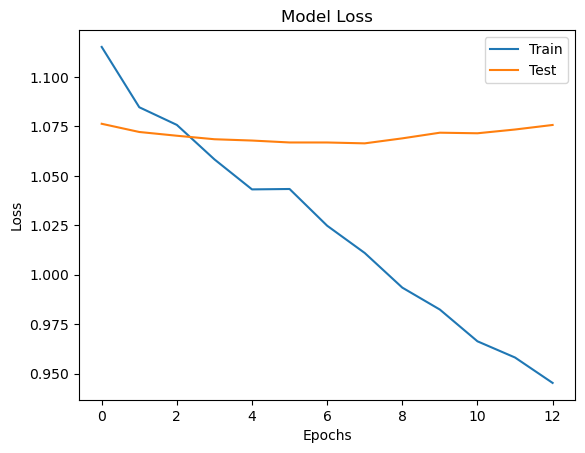

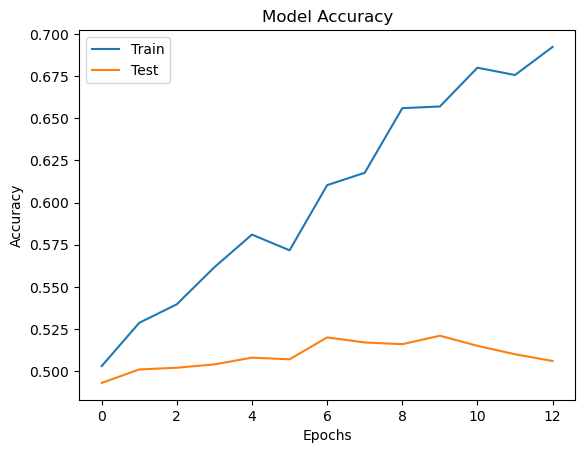

In [184]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()